In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
import seaborn as sns
from datetime import datetime
import math 

In [45]:
df_info = pd.read_csv('colect_data\colect_data\clean_data.csv')
df_info.drop(df_info[df_info['Price(Triệu/tháng)'] > 100].index, inplace = True)
df_info.head()

,Id,Title,Price(Triệu/tháng),Square(m²),District,City,Date
0,478324,Cho thuê phòng để ở tại 108/64A1 Trần Quang Di...,3.50,18.0,Quận 3,Hồ Chí Minh,20/06/2020
1,723089,"Phòng trọ,căn hộ mini đầy đủ tiện nghi ngay tr...",6.00,70.0,Quận 4,Hồ Chí Minh,21/11/2018
2,728993,Phòng vừa xây xong thoáng mát gần các trường Đ...,3.30,25.0,Quận 7,Hồ Chí Minh,17/10/2018
3,745037,Cho nam thuê phòng (ghép) tại quận 10. Nhà ở t...,1.45,8.0,Quận 10,Hồ Chí Minh,03/10/2018
4,781296,Cần share lại gấp phòng trọ mới thuê tại đường...,3.00,15.0,Quận 10,Hồ Chí Minh,05/10/2018


In [46]:
# giờ t có giá/m2 của một bài đăng
# giá trung bình của quận
# giá tốt nhất


In [47]:
quan = pd.unique(df_info.District)
print ("QUAN: ",type (quan))
df_info["Date"] = pd.to_datetime(df_info["Date"],format = "%d/%m/%Y ",errors = 'coerce')
array = {}
process = df_info.dropna()
#Lấy ngày hiện tại
today = date.today()
today = np.datetime64(today)

QUAN:  <class 'numpy.ndarray'>


### Tìm ra giá nhà phù hợp nhất theo quận 
Một số người cần thuê nhà/phòng trọ gấp, không có thời gian để đọc được trên một số lượng lớn bài đăng để tìm ra phòng hợp lí cho mình. Những phòng/nhà trọ giá rẻ thường có diện tích nhỏ và sẽ khó có những tiện tích như wifi, nhà xe, camera an ninh, bảo vệ, dọn vệ sinh... Vì vậy để có được giá cả hợp lí thì ta sẽ dựa vào giá nhà trung bình trong quận và tìm ra giá gần với trung bình nhất. Để giảm thiểu về các biến động giá ta sẽ tính trong 2 năm gần nhất.


 Để tìm trung bình giá của một quận, ta sẽ tính trung bình giá của một bài đăng sau đó cộng lại và chia cho số lượng bài đăng. Từ đây ta sẽ tìm bài đăng có khoảng cách ngắn nhất so với trung bình.

In [91]:
#Xét theo quận
for i in quan:
    arr = {}
    district = process[process['District'] == i]
    price = district['Price(Triệu/tháng)']
    price  = list (price)
    square =  district['Square(m²)']
    square  = list (square)
    #Các bài đăng trong quận đó
    post = np.array([price[i] / square[i] for i in range(0,len(price))])
    lenPost = len(post)
    # Giá trung bình của một một quận
    Medimum = np.array([price[i] / square[i] for i in range(0,len(price))]).sum()/len(price)
    first = district.values[0]
    first = first[2]/first[3]
    min = 5000
    Get = district.head(1).values
    #Lưu price/square của một bài đăng
    each = []
    #Biến chọn giá
    choosePrice = min
    for j in district.values:
        checkDate = pd.to_datetime(j[6],format = "%d/%m/%Y ",errors = 'coerce')
        count = today - checkDate
        if (count.days < 705):
            if pd.notna(j[2]) & pd.notna(j[3]):
                #giá một bài
                cal =  float (j[2]/j[3])
                if (cal != 0):
                    each.append(cal)
                    find = float(abs(cal-Medimum))
                    if find <= min:
                        choosePrice = cal
                        min = find
                        Get = j
    arr['Price'] = price
    arr['Square'] = square
    arr['Price/square'] = post
    arr['Price/square count'] = lenPost 
    arr['Price/square medium'] = Medimum
    arr['Choosen Price/square'] = choosePrice
    arr['Choosen inf'] = Get
    
    array[i] = arr


#### Lựa ra các quận tiêu biểu để trực quan hoá, dựa trên số lượng bài đăng

In [107]:
select = {}
sort =[]
for j in array:
    # print (set(array[j]["Choosen inf"]))
    sort.append(array[j]["Price/square count"])
sort.sort(reverse=True)
sort = sort[:9]
# print (sort)
quan = []
for i in sort:
    for j in array:
        # print (set(array[j]["Choosen inf"]))
        if i == array[j]["Price/square count"]:
            select[j] = array[j]
            quan.append (j)

# print (select)  
print("Các quận tiêu biểu là: ", quan) 
array = select

Các quận tiêu biểu là:  ['Bình Thạnh', 'Tân Bình', 'Quận 7', 'Gò Vấp', 'Quận 1', 'Phú Nhuận', 'Tân Phú', 'Quận 10', 'Quận 3']


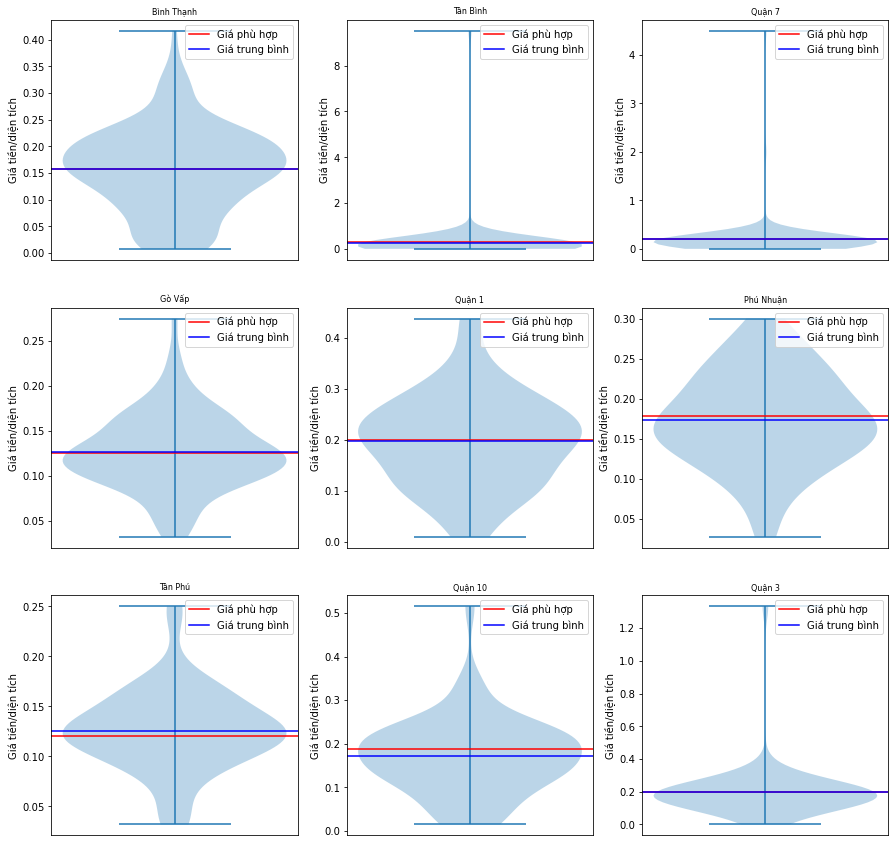

In [109]:
#Vẽ biểu biểu đồ
fig ,axis = plt.subplots(3,3,figsize =(15, 15))
run = 0
for i in range(0,3 ):
    for j in range(0,3 ):
        if run != len(quan) :
            axis[i][j].violinplot(array[quan[run]]["Price/square"])
            # axis[i][j].set_xlabel("Số bài đăng")
            axis[i][j].set_ylabel("Giá tiền/diện tích")
            axis[i][j].set_title(quan[run], fontsize = 8)
            x = array[quan[run]]['Choosen Price/square']
            x1 = array[quan[run]]['Price/square medium']
            axis[i][j].axhline(y = x, color = 'r', linestyle = '-',label ='Giá phù hợp')
            axis[i][j].axhline(y = x1, color = 'b', linestyle = '-',label ='Giá trung bình')
            axis[i][j].legend()
            axis[i][j].set_xticks([])
            run += 1

### Thông tin của các bài đăng sau khi đã lựa chọn

In [106]:
# Data
# print ("Data: ", array)
for j in array:
    # print (set(array[j]["Choosen inf"]))
    if (type(array[j]["Choosen inf"])!= float):
        print("================================== ")
        print (j)
        print("Giá trung bình: ", array[j]["Price/square medium"])
        print("Giá phù hợp: ", array[j]["Choosen Price/square"])
        print("*Thông tin* ")
        print("ID: ", array[j]["Choosen inf"][0])
        print("Tiêu đề: ", array[j]["Choosen inf"][1])
        print ("Giá (triệu/tháng): ", array[j]["Choosen inf"][2] )
        print ("Diện tích: ", array[j]["Choosen inf"][3]) 
        print ('Ngày đăng: ', array[j]["Choosen inf"][6])
        print (" ")

Bình Thạnh
Giá trung bình:  0.1582742733637241
Giá phù hợp:  0.15714285714285714
*Thông tin* 
ID:  2023597
Tiêu đề:  Phòng trọ Bình Thạnh thuận tiện cho sinh viên gần nhiều trường ĐH
Giá (triệu/tháng):  5.5
Diện tích:  35.0
Ngày đăng:  2022-08-04 00:00:00
 
Tân Bình
Giá trung bình:  0.2711641400715564
Giá phù hợp:  0.3125
*Thông tin* 
ID:  1511004
Tiêu đề:  Cho thuê phòng có máy lạnh, có gác, ful nội thất tại 654/32 Lạc Long Quân, P. 9, Q. Tân Bình (ngay ngã 4 Âu Cơ - Lạc Long Quân)
Giá (triệu/tháng):  5.0
Diện tích:  16.0
Ngày đăng:  2022-07-18 00:00:00
 
Quận 7
Giá trung bình:  0.197238406355867
Giá phù hợp:  0.19642857142857142
*Thông tin* 
ID:  1775555
Tiêu đề:  Cho thuê căn hộ đầy đủ nội thất, máy giặt riêng, gác cao 1m8 đường Lý Phục Man, Quận 7-giá chỉ 5tr5
Giá (triệu/tháng):  5.5
Diện tích:  28.0
Ngày đăng:  2021-05-19 00:00:00
 
Gò Vấp
Giá trung bình:  0.12634126715186852
Giá phù hợp:  0.125
*Thông tin* 
ID:  1772744
Tiêu đề:  Cho Thuê Phòng Đường Lê Đức Thọ bao điện nước rẻ
G